In [237]:
import pandas as pd
from sqlalchemy import create_engine
import json
import matplotlib as plt
import seaborn as sns

In [238]:
dtypes = {
    'weight' : str,
    'height' : str,
}

conn = create_engine('sqlite:///newdb.db')
data = pd.read_sql('Player Values', conn, coerce_float=False ,columns=['id', 
                                                    'name', 
                                                    'pos',
                                                    'age', 
                                                    'weight',
                                                    'height',
                                                    'drafted',
                                                    'draftClass',
                                                    'exp', 
                                                    'valueData',
                                                    ])

In [239]:
def cleanJson(x):
    x = x.replace("'",'"')
    js = json.loads(x)
    return js

In [240]:
def toDataframe(x):
    df = pd.json_normalize(x).T
    return df

In [241]:
data['valueData'] = data['valueData'].apply(cleanJson)

ktcHeaders = pd.json_normalize(data.iloc[0]['valueData']).T.iloc[0]
ktcHeaders[-1:] = '2021-12-31'
ktcDf = pd.DataFrame(columns=ktcHeaders)

for i in range(0,len(data.valueData)):
    df = pd.json_normalize(data.valueData[i]).T.reset_index().drop('index',1)
    df.loc[0][-1:] = '2021-12-31'
    df.columns = df.iloc[0]
    df = df[1:]

    ktcDf = ktcDf.append(df)

ktcDf = ktcDf.reset_index().drop('index', 1).astype(float)


C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2856557701.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = pd.json_normalize(data.valueData[i]).T.reset_index().drop('index',1)
C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2856557701.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ktcDf = ktcDf.reset_index().drop('index', 1).astype(float)


In [242]:
df = data.join(ktcDf).drop('valueData',1)

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/1005522674.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = data.join(ktcDf).drop('valueData',1)


In [243]:
#Masks
rookieMask = df.exp == 'Rookie'
nonPlayerMask = df.exp.isna()

In [244]:
nonFirstYearPlayers = df[-rookieMask & -nonPlayerMask]
groupbyPosNonFirstYear=nonFirstYearPlayers.groupby('pos')

In [245]:
groupbyPosNonFirstYear['id'].count()

pos
Quarterback       41
Running Back      89
Tight End         47
Wide Receiver    112
Name: id, dtype: int64

In [246]:
groupbyPosNonFirstYear['age'].mean()

pos
Quarterback      28.634146
Running Back     25.573034
Tight End        26.468085
Wide Receiver    26.044643
Name: age, dtype: float64

C:\Users\simer\AppData\Local\Temp/ipykernel_16060/2751764791.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  d = groupbyPosNonFirstYear.mean().drop(['id','age'],1).T


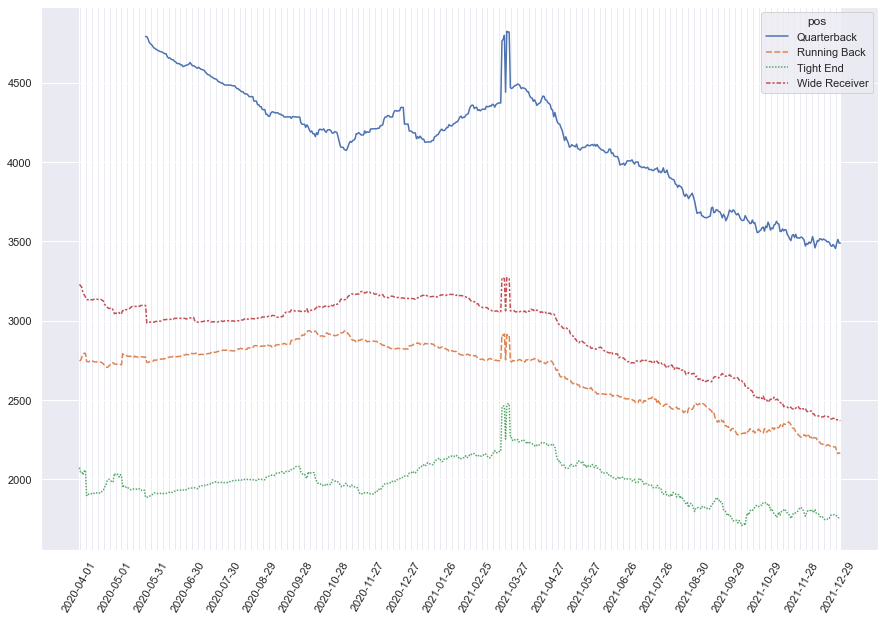

In [260]:
d = groupbyPosNonFirstYear.mean().drop(['id','age'],1).T
sns.set(rc={'figure.figsize':(15,10)})
plot = sns.lineplot(data=d)

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 30 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot.tick_params(axis='x', rotation=60)